In [2]:
import pandas as pd
import numpy as np
import random
from subprocess import check_output
import os
import seaborn as sns
import pickle

# for generating pairwise (dis)similarity matrices
import sklearn.neighbors as skn
import sklearn.metrics as skm

import sklearn
from sklearn.utils import shuffle
from sklearn.cluster import KMeans
from sklearn import datasets
from pandas.plotting import scatter_matrix, parallel_coordinates, andrews_curves

# for clustering models
from sklearn import cluster
import scipy.cluster.hierarchy as hclust
import scipy.stats
from sklearn.neighbors import kneighbors_graph

from IPython import display
from IPython.core.display import Image

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#tslearn tutorials at http://tslearn.readthedocs.io

import tslearn

from tslearn.generators import random_walks
from tslearn.preprocessing import TimeSeriesScalerMeanVariance, TimeSeriesResampler
from tslearn.preprocessing import TimeSeriesScalerMinMax

from tslearn.piecewise import PiecewiseAggregateApproximation
from tslearn.piecewise import SymbolicAggregateApproximation, OneD_SymbolicAggregateApproximation

from tslearn.clustering import TimeSeriesKMeans

seed = 1
np.random.seed(seed)

In [4]:
# loading the cleaned stock data from 'Final Project - Pre-processing Data 2016 only.ipynb'
df_stocks_2017 = pd.read_csv('./stocks_clean_2017.csv', sep=',', index_col=0)

In [5]:
df_stocks_2017.head()

,a,aa,aaap,aaba,aac,aal,aamc,aame,aan,aaoi,...,zoes,zsan,zto,ztr,zts,zumz,zvv,zx,zyme,zyne
2017-01-03,46.178,28.83,27.16,38.90,7.72,45.904,53.00,4.0794,31.824,23.10,...,23.48,0.7820,12.19,10.266,53.209,22.00,100.14,1.2289,13.0,17.95
2017-01-04,46.784,30.26,27.25,40.06,7.69,46.301,55.95,4.0794,32.492,23.52,...,24.63,0.8700,12.27,10.321,53.726,22.75,100.14,1.2500,13.0,18.75
2017-01-05,46.228,30.65,27.37,41.34,7.54,45.507,58.00,3.8307,31.235,22.81,...,25.55,0.9698,12.97,10.345,53.549,20.60,100.14,1.2886,13.0,19.20
2017-01-06,47.668,30.68,27.51,41.23,7.54,45.815,59.00,4.0794,30.787,22.41,...,25.76,1.0600,13.34,10.325,53.716,19.85,100.14,1.2100,13.0,18.25
2017-01-09,47.817,29.48,28.03,41.34,7.56,46.678,59.90,3.9302,31.175,22.24,...,23.66,1.0700,13.00,10.298,53.569,19.95,100.14,1.2172,13.0,18.08


In [6]:
df_stocks_2017.shape

(223, 7163)

In [7]:
df_transposed = df_stocks_2017.T

In [8]:
df_transposed.shape

(7163, 223)

In [9]:
df_transposed.head()

,2017-01-03,2017-01-04,2017-01-05,2017-01-06,2017-01-09,2017-01-10,2017-01-11,2017-01-12,2017-01-13,2017-01-17,...,2017-10-30,2017-10-31,2017-11-01,2017-11-02,2017-11-03,2017-11-06,2017-11-07,2017-11-08,2017-11-09,2017-11-10
a,46.178,46.784,46.228,47.668,47.817,47.777,48.92,48.194,48.363,47.996,...,67.49,68.03,68.02,68.13,68.37,68.22,68.25,68.11,67.47,66.81
aa,28.830,30.260,30.650,30.680,29.480,30.980,31.97,33.040,33.010,32.640,...,47.42,47.78,47.70,47.46,47.12,47.29,46.97,45.89,43.33,43.01
aaap,27.160,27.250,27.370,27.510,28.030,28.350,28.84,29.010,29.125,28.370,...,80.50,81.00,81.03,81.00,80.99,80.96,81.00,80.93,81.00,80.98
aaba,38.900,40.060,41.340,41.230,41.340,42.300,42.59,42.110,42.270,41.990,...,68.86,70.12,70.59,70.51,70.23,71.71,72.22,71.16,70.19,70.56
aac,7.720,7.690,7.540,7.540,7.560,7.920,8.26,8.000,8.090,8.000,...,8.20,7.92,7.55,10.02,10.08,11.14,11.07,11.11,10.88,11.28


In [10]:
df_transposed_500 = df_transposed.sample(n=500, replace=False, random_state=101)

In [11]:
df_transposed_500.head()

,2017-01-03,2017-01-04,2017-01-05,2017-01-06,2017-01-09,2017-01-10,2017-01-11,2017-01-12,2017-01-13,2017-01-17,...,2017-10-30,2017-10-31,2017-11-01,2017-11-02,2017-11-03,2017-11-06,2017-11-07,2017-11-08,2017-11-09,2017-11-10
hae,39.600,39.890,39.410,39.630,39.960,40.460,40.070,40.030,40.450,39.510,...,47.110,47.560,46.640,46.52,47.12,46.830,51.510,54.22,54.92,54.52
dan,18.982,19.615,19.475,19.120,18.853,19.595,19.438,19.061,19.130,19.001,...,29.663,30.431,30.821,31.31,31.28,30.821,30.771,31.13,30.58,30.57
lnt,36.748,36.971,36.922,36.622,36.118,36.079,36.573,36.476,36.320,36.573,...,43.180,43.260,43.070,43.06,43.83,43.590,44.170,44.07,44.10,43.68
awr,44.236,44.906,44.059,43.508,42.603,42.771,43.193,42.494,42.967,42.455,...,53.740,53.750,53.620,54.11,53.80,53.990,53.440,53.95,53.67,52.94
feng,3.210,3.380,3.350,3.150,3.230,3.275,3.300,3.230,3.390,3.360,...,5.670,5.440,5.370,5.27,5.27,5.340,5.640,5.35,5.38,5.46


In [12]:
df_transposed_500.shape

(500, 223)

In [32]:
# write to a csv file so we can just load it later if needed
df_transposed_500.to_csv('stocks_2017_500.csv')

In [13]:
df_matrix = df_transposed_500.as_matrix()

In [14]:
type(df_matrix)

numpy.ndarray

In [15]:
df_matrix

array([[  39.6   ,   39.89  ,   39.41  , ...,   54.22  ,   54.92  ,   54.52  ],
       [  18.982 ,   19.615 ,   19.475 , ...,   31.13  ,   30.58  ,   30.57  ],
       [  36.748 ,   36.971 ,   36.922 , ...,   44.07  ,   44.1   ,   43.68  ],
       ..., 
       [   9.2159,    9.2548,    9.2837, ...,    9.71  ,    9.75  ,    9.75  ],
       [   8.2805,    8.354 ,    8.3447, ...,    9.22  ,    9.18  ,    9.19  ],
       [ 783.352 ,  779.59  ,  793.53  , ...,  636.71  ,  628.4   ,  625.2   ]])

In [16]:
# 500 randomly chosen tickers and 223 trading days in 2017
df_matrix.shape

(500, 223)

In [17]:
# use tslearn package function "TimeSeriesScalerMeanVariance" to normalize the data to a mean of
# 0 and standard deviation of 1, and also change into a 3-dimensional array which tslearn classes and
# functions require if more than one time series.
scaler = TimeSeriesScalerMeanVariance()
df_scaled = scaler.fit_transform(df_matrix)

In [18]:
df_scaled[0]

array([[ -6.42865004e-01],
       [ -5.42963334e-01],
       [ -7.08317822e-01],
       [ -6.32530348e-01],
       [ -5.18849138e-01],
       [ -3.46604880e-01],
       [ -4.80955401e-01],
       [ -4.94734942e-01],
       [ -3.50049765e-01],
       [ -6.73868970e-01],
       [ -6.70424085e-01],
       [ -4.98179827e-01],
       [ -4.77510516e-01],
       [ -6.08416152e-01],
       [ -7.39321788e-01],
       [ -6.15305923e-01],
       [ -7.70325755e-01],
       [ -5.70522416e-01],
       [ -8.01329721e-01],
       [ -5.53297990e-01],
       [ -2.77707177e-01],
       [ -2.43258325e-01],
       [ -4.34549863e-02],
       [ -1.19404663e+00],
       [ -1.48686187e+00],
       [ -1.57298400e+00],
       [ -1.40418462e+00],
       [ -1.32150738e+00],
       [ -1.24227502e+00],
       [ -1.22505060e+00],
       [ -1.22849548e+00],
       [ -1.31806249e+00],
       [ -1.28016876e+00],
       [ -1.28016876e+00],
       [ -1.14926312e+00],
       [ -1.31117272e+00],
       [ -1.36629089e+00],
 

In [19]:
# 500 time series , over a size of 223 days, with 1-dimension (single feature)
df_scaled.shape

(500, 223, 1)

In [20]:
# store the size of the time series, which is 261 trading days for the year 2016
sz = df_scaled.shape[1]
sz

223

In [23]:
#Try Euclidean K-means clustering first
print("Euclidean k-means")
km = TimeSeriesKMeans(n_clusters=3, verbose=True, random_state=seed)
clusters_euclid = km.fit_predict(df_scaled)

Euclidean k-means
209.503 --> 120.409 --> 115.965 --> 115.252 --> 115.093 --> 115.062 --> 115.052 --> 115.052 --> 


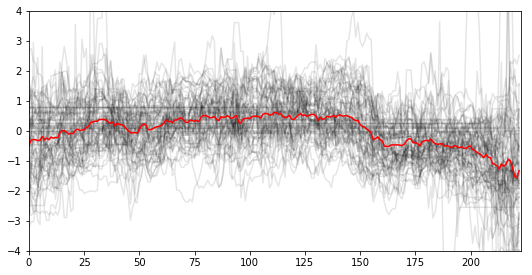

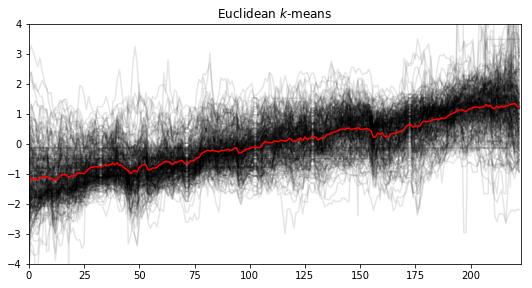

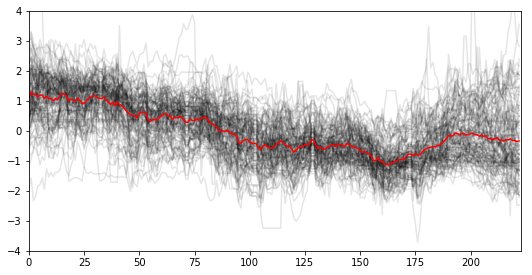

In [24]:
# plot the 3 clusters for Euclidean distance
plt.figure()
for yi in range(3):
    plt.figure(figsize=(30,15))
    plt.subplot(3, 3, yi + 1)
    for xx in df_scaled[clusters_euclid == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.1)
    plt.plot(km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    if yi == 1:
        plt.title("Euclidean $k$-means")
plt.show()

In [25]:
# Euclidean clustering labels
euclid_labels = km.labels_
print(euclid_labels)

[1 1 1 1 1 1 1 1 1 1 1 1 0 2 1 2 1 1 2 1 2 0 1 0 1 1 1 1 1 2 1 1 2 2 2 2 1
 1 1 1 1 0 1 1 1 2 2 1 2 1 1 0 1 1 0 1 2 2 1 1 1 2 0 2 2 1 2 1 2 0 0 1 1 2
 2 2 1 2 1 0 1 1 1 0 2 1 1 0 2 1 2 1 1 1 1 0 0 1 2 2 0 1 1 2 2 0 1 0 2 1 2
 1 1 1 2 2 1 1 1 1 1 1 2 1 1 1 1 2 1 1 1 1 1 2 0 0 2 1 0 0 1 0 1 0 1 2 2 2
 0 1 2 1 2 2 1 1 1 0 0 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 1 2 1 2 1 1 1 0 1
 1 1 1 0 2 0 1 2 1 1 0 1 0 1 1 0 1 1 2 1 0 0 1 1 1 1 1 1 0 1 1 2 0 1 1 0 2
 1 2 1 2 1 1 0 1 1 2 0 1 1 2 1 1 2 2 1 1 2 1 1 1 2 1 1 2 0 1 2 1 1 1 2 1 2
 1 1 2 1 2 1 2 0 1 0 1 2 1 0 0 1 1 1 1 2 1 1 2 1 1 1 1 2 1 1 1 0 1 1 1 1 1
 1 2 2 1 1 0 1 1 1 2 0 1 2 0 1 1 1 0 0 1 1 1 1 1 1 2 1 2 2 1 1 2 1 2 1 1 1
 1 1 1 1 1 1 2 2 1 0 1 0 2 1 1 0 2 1 2 1 0 1 0 1 0 1 1 2 2 0 0 1 1 1 1 0 1
 2 0 1 1 2 1 1 1 1 0 2 2 1 2 1 2 1 0 0 1 1 2 1 0 1 1 0 0 1 1 2 1 1 1 1 0 2
 1 1 2 2 1 1 1 1 1 1 0 2 1 2 1 1 0 0 1 1 1 0 2 1 1 1 1 1 2 1 2 2 1 1 2 1 1
 0 1 1 1 1 0 1 2 1 1 1 1 1 2 2 2 1 1 2 0 1 1 2 0 1 1 2 1 1 2 1 1 1 2 1 2 1
 1 1 0 2 2 1 1 1 2 1 1 1 

In [26]:
# another way of calling the clusters
clusters_euclid

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1, 2, 1, 1, 2, 1, 2, 0, 1,
       0, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 1, 1, 1, 2,
       2, 1, 2, 1, 1, 0, 1, 1, 0, 1, 2, 2, 1, 1, 1, 2, 0, 2, 2, 1, 2, 1, 2,
       0, 0, 1, 1, 2, 2, 2, 1, 2, 1, 0, 1, 1, 1, 0, 2, 1, 1, 0, 2, 1, 2, 1,
       1, 1, 1, 0, 0, 1, 2, 2, 0, 1, 1, 2, 2, 0, 1, 0, 2, 1, 2, 1, 1, 1, 2,
       2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 0, 0, 2, 1,
       0, 0, 1, 0, 1, 0, 1, 2, 2, 2, 0, 1, 2, 1, 2, 2, 1, 1, 1, 0, 0, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1, 2, 1, 2, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 2, 0, 1, 2, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 2, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 0, 1, 1, 0, 2, 1, 2, 1, 2, 1, 1, 0, 1,
       1, 2, 0, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 0, 1, 2,
       1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 2, 0, 1, 0, 1, 2, 1, 0, 0, 1, 1,
       1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 2, 2,
       1, 1,

(array([  80.,    0.,    0.,    0.,    0.,  301.,    0.,    0.,    0.,  119.]),
 array([ 0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4,  1.6,  1.8,  2. ]),
 <a list of 10 Patch objects>)

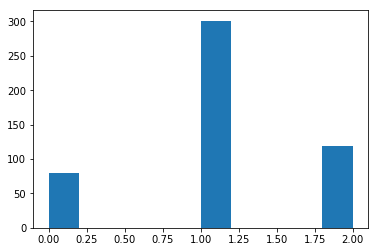

In [27]:
# plot histogram of cluster distribution for Euclidean distance K-means
plt.hist(clusters_euclid)

In [28]:
km.cluster_centers_[0]

array([[-0.48123665],
       [-0.30474281],
       [-0.2875179 ],
       [-0.29518323],
       [-0.32133499],
       [-0.31685185],
       [-0.18306396],
       [-0.30111115],
       [-0.23819063],
       [-0.29550819],
       [-0.20544288],
       [-0.24440283],
       [-0.21676012],
       [-0.2322168 ],
       [-0.0630636 ],
       [ 0.01265561],
       [ 0.00384146],
       [-0.03862501],
       [-0.10636214],
       [-0.07897051],
       [-0.09581353],
       [ 0.01838578],
       [ 0.0585561 ],
       [ 0.01248255],
       [ 0.03048236],
       [ 0.03435245],
       [ 0.10947477],
       [ 0.15114561],
       [ 0.29273979],
       [ 0.29781826],
       [ 0.32618736],
       [ 0.31877717],
       [ 0.37982329],
       [ 0.37982329],
       [ 0.38273195],
       [ 0.35452054],
       [ 0.29314891],
       [ 0.24889829],
       [ 0.29489377],
       [ 0.16603447],
       [ 0.26044706],
       [ 0.21038296],
       [ 0.20768049],
       [ 0.16614512],
       [ 0.07619971],
       [ 0

In [33]:
# DBA-k-means
print("DBA k-means")
dba_km = TimeSeriesKMeans(n_clusters=3, n_init=2, metric="dtw", verbose=True, max_iter_barycenter=2, random_state=seed)
y_pred = dba_km.fit_predict(df_scaled)

DBA k-means
Init 1
64.900 --> 35.149 --> 31.690 --> 30.476 --> 29.827 --> 29.515 --> 29.173 --> 28.992 --> 28.855 --> 28.751 --> 28.637 --> 28.532 --> 28.430 --> 28.363 --> 28.293 --> 28.218 --> 28.145 --> 28.055 --> 27.950 --> 27.885 --> 27.819 --> 27.735 --> 27.666 --> 27.627 --> 27.588 --> 27.551 --> 27.511 --> 27.481 --> 27.459 --> 27.439 --> 27.421 --> 27.406 --> 27.393 --> 27.373 --> 27.361 --> 27.349 --> 27.298 --> 27.246 --> 27.206 --> 27.173 --> 27.146 --> 27.124 --> 27.101 --> 27.069 --> 27.051 --> 27.036 --> 27.027 --> 27.017 --> 27.013 --> 27.010 --> 


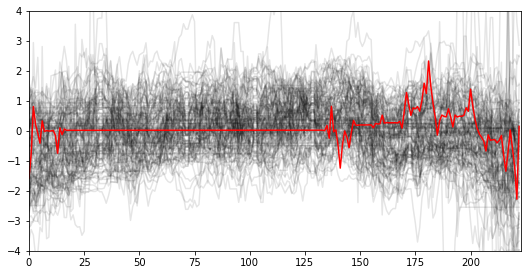

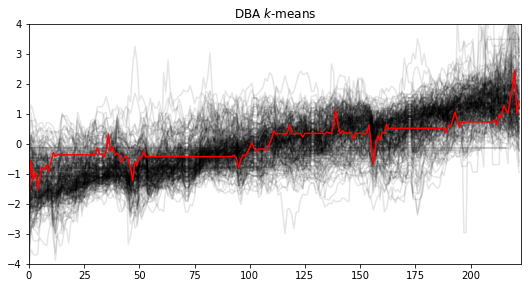

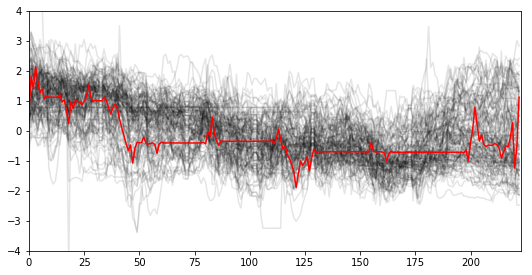

In [37]:
# plot DBA-k-means clusters
for yi in range(3):
    plt.figure(figsize=(30,15))
    plt.subplot(3, 3, 4 + yi)
    for xx in df_scaled[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.1)
    plt.plot(dba_km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    if yi == 1:
        plt.title("DBA $k$-means")

In [38]:
# Get the DBA DTW cluster labels
dba_dtw_labels = dba_km.labels_
print(dba_dtw_labels)

[1 1 1 1 1 0 1 1 1 1 0 2 0 2 1 2 1 1 2 1 2 0 1 0 1 1 1 1 1 2 1 1 2 2 2 2 1
 0 1 1 0 2 2 1 2 1 2 1 0 0 1 0 1 0 0 1 2 2 1 1 1 2 0 0 2 1 2 0 2 2 0 1 1 2
 0 2 1 2 1 0 1 1 1 0 2 1 1 0 2 1 2 1 1 1 1 0 0 1 2 0 0 1 1 2 2 0 1 0 2 1 2
 1 0 1 2 2 1 1 1 1 1 0 2 0 1 1 1 0 1 1 1 1 1 2 0 0 2 1 0 0 1 1 1 0 0 2 2 2
 0 1 2 1 2 2 1 1 1 0 0 0 2 1 0 1 2 1 1 1 0 1 0 1 1 2 0 2 1 2 1 2 1 1 0 0 1
 1 1 1 0 2 0 1 2 1 1 0 1 0 0 1 0 1 1 2 1 0 0 1 1 1 1 1 0 0 1 1 2 2 1 2 0 2
 1 2 1 2 1 1 0 1 1 2 0 1 1 2 1 2 2 0 1 1 2 1 1 1 2 1 1 2 2 0 2 1 1 1 0 0 2
 1 1 2 1 2 0 2 0 1 0 1 2 0 0 0 1 2 1 1 2 1 1 2 1 1 0 1 2 1 1 1 0 1 1 1 2 1
 2 2 2 1 1 0 1 0 1 2 0 0 2 0 1 1 0 0 0 0 0 1 0 1 1 0 2 0 2 1 0 2 1 2 1 1 1
 1 0 1 1 1 1 2 2 1 2 1 0 2 1 1 0 2 1 2 1 0 1 0 1 0 1 1 2 0 0 0 1 1 1 1 0 1
 2 0 1 1 2 1 1 1 1 0 0 1 1 2 1 2 1 0 0 1 1 0 1 0 1 2 0 0 1 1 2 1 1 1 1 0 2
 1 1 2 2 1 1 1 1 1 1 0 0 0 2 0 1 0 0 1 1 1 0 2 1 2 1 1 1 2 0 2 2 0 1 0 1 0
 0 1 0 0 1 0 1 0 1 1 1 1 1 2 2 2 1 1 2 0 1 1 2 0 1 1 2 1 1 2 1 1 1 2 1 2 0
 1 0 0 2 2 1 1 2 2 1 1 1 

(array([ 129.,    0.,    0.,    0.,    0.,  250.,    0.,    0.,    0.,  121.]),
 array([ 0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4,  1.6,  1.8,  2. ]),
 <a list of 10 Patch objects>)

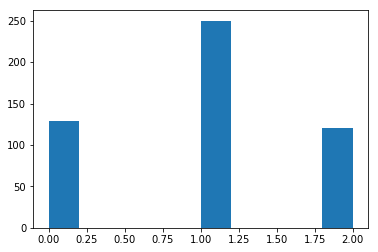

In [39]:
plt.hist(dba_dtw_labels)

In [29]:
# Soft-DTW-k-means
print("Soft-DTW k-means")
sdtw_km = TimeSeriesKMeans(n_clusters=3, metric="softdtw", metric_params={"gamma_sdtw": .01},
                           verbose=True, random_state=seed)
y_pred = sdtw_km.fit_predict(df_scaled)


Soft-DTW k-means
7266.266 --> 1515.339 --> 1511.075 --> 1345.161 --> 1311.983 --> 1310.134 --> 1299.984 --> 1323.102 --> 1328.836 --> 1328.836 --> 


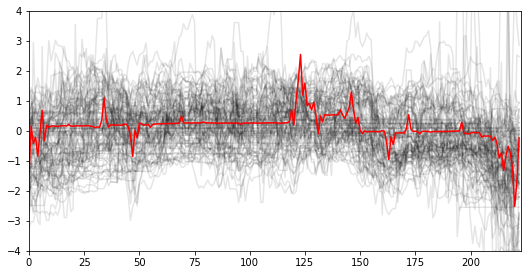

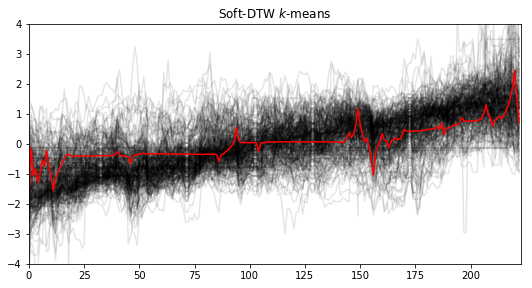

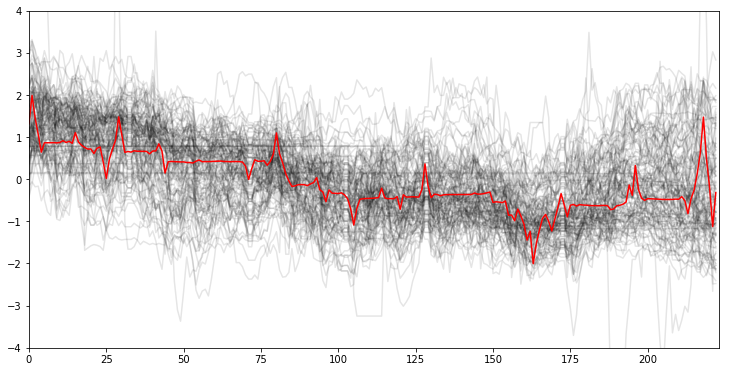

In [30]:
# plot Soft-DTW-k-means
for yi in range(3):
    plt.figure(figsize=(30,15))
    plt.subplot(3, 3, 7 + yi)
    for xx in df_scaled[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.1)
    plt.plot(sdtw_km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    if yi == 1:
        plt.title("Soft-DTW $k$-means")

plt.tight_layout()
plt.show()

In [31]:
# Get the soft DTW cluster labels
soft_dtw_labels = sdtw_km.labels_
print(soft_dtw_labels)

[1 1 1 1 1 0 1 1 1 1 0 1 1 2 1 2 1 1 2 1 2 2 1 2 1 1 1 1 1 2 1 1 2 2 2 2 1
 0 1 1 1 0 2 1 1 1 0 1 1 0 1 0 1 1 0 1 0 2 1 1 1 2 0 0 2 1 2 1 2 2 0 1 1 0
 0 2 1 2 1 0 1 1 1 0 2 1 1 0 2 1 2 1 1 1 1 0 0 1 2 0 0 1 1 1 2 2 1 0 2 1 2
 1 1 1 2 2 1 1 1 1 1 0 2 1 1 1 1 2 1 1 1 1 1 2 0 0 2 1 0 0 1 1 1 0 0 2 2 2
 0 1 2 1 2 2 1 1 1 0 1 0 2 1 0 1 2 1 1 1 1 1 0 1 1 2 0 2 1 2 1 2 1 1 0 0 1
 1 1 1 0 2 0 1 2 1 1 0 1 0 1 1 2 1 1 2 1 0 0 1 1 1 1 1 1 0 1 1 2 2 1 1 0 2
 1 2 1 2 1 1 2 1 1 2 0 1 1 2 1 1 2 0 1 1 2 1 1 1 2 1 1 2 2 0 2 1 1 1 0 1 2
 1 1 2 1 2 0 2 0 1 0 1 2 1 0 0 1 2 1 1 2 1 1 2 1 1 0 1 2 1 1 1 0 1 1 1 1 1
 1 2 2 1 1 0 1 0 1 2 0 1 2 0 1 1 1 2 0 1 1 1 0 1 1 0 2 0 2 1 0 2 1 2 1 1 1
 1 1 1 1 1 1 2 2 1 2 1 2 0 1 1 0 2 1 0 1 0 1 0 1 0 1 1 2 2 0 2 1 1 1 1 0 1
 2 0 1 1 2 1 1 1 1 0 2 1 1 2 1 2 1 0 0 1 1 0 1 0 1 2 0 0 1 1 2 1 1 1 1 0 0
 1 1 2 2 1 1 1 1 1 1 0 0 2 2 0 1 2 0 1 1 1 0 2 1 2 1 1 1 2 0 2 2 1 1 1 1 1
 0 1 1 0 1 0 1 2 1 1 1 1 1 2 2 2 1 1 2 0 1 1 2 0 1 1 2 1 1 2 1 1 1 2 1 2 1
 1 1 0 2 2 1 1 1 2 1 1 1 

(array([  98.,    0.,    0.,    0.,    0.,  282.,    0.,    0.,    0.,  120.]),
 array([ 0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4,  1.6,  1.8,  2. ]),
 <a list of 10 Patch objects>)

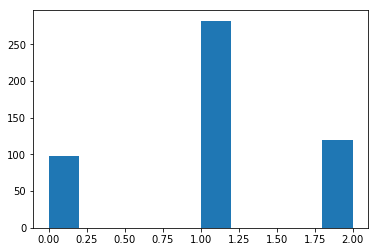

In [32]:
plt.hist(soft_dtw_labels)

In [40]:
# Then we can use the elbow method to assess the ideal K. 

# This function definition is taken from the below link
# https://github.com/analyticalmonk/KMeans_elbow/blob/master/kmeans_elbow.ipynb

# Elbow criterion
def elbow_plot(data, maxK=10, seed_centroids=None):
    """
        parameters:
        - data: pandas DataFrame (data to be fitted)
        - maxK (default = 10): integer (maximum number of clusters with which to run k-means)
        - seed_centroids (default = None ): float (initial value of centroids for k-means)
    """
    sse = {}
    for k in range(3, maxK):
        print("k: ", k)
        if seed_centroids is not None:
            seeds = seed_centroids.head(k)
            kmeans = cluster.KMeans(n_clusters=k, max_iter=500, n_init=100, random_state=0, init=np.reshape(seeds, (k,1))).fit(data)
            data["clusters"] = kmeans.labels_
        else:
            kmeans = cluster.KMeans(n_clusters=k, max_iter=300, n_init=100, random_state=0).fit(data)
            data["clusters"] = kmeans.labels_
        # Inertia: Sum of distances of samples to their closest cluster center
        sse[k] = kmeans.inertia_
    plt.figure()
    plt.plot(list(sse.keys()), list(sse.values()))
    plt.show()
    return

k:  3
k:  4
k:  5
k:  6
k:  7
k:  8
k:  9


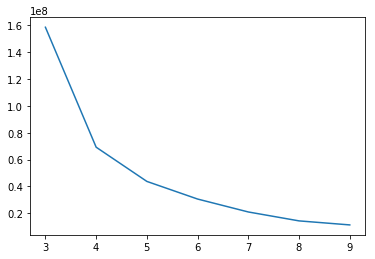

In [41]:
# Call the above function setting the maxK to the result that we got from the empirical method (~ 25 here)
elbow_plot(df_transposed_500, maxK=10)

In [34]:
#Try Euclidean K-means clustering first with K=5
print("Euclidean k-means")
km_5 = TimeSeriesKMeans(n_clusters=5, verbose=True, random_state=seed)
clusters_euclid_5 = km_5.fit_predict(df_scaled)

Euclidean k-means
152.221 --> 101.092 --> 98.251 --> 97.070 --> 96.435 --> 96.188 --> 96.087 --> 96.058 --> 96.034 --> 96.034 --> 


In [37]:
# use sklearn package's metrics class to get the silhouette score
skm.silhouette_score(df_matrix, clusters_euclid_5, metric='euclidean')  

-0.33692593478545518

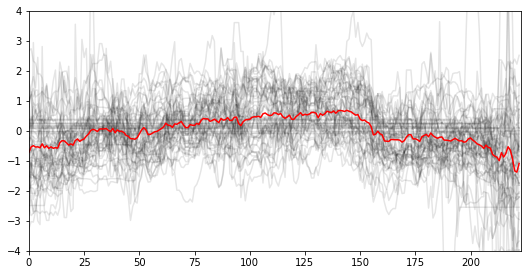

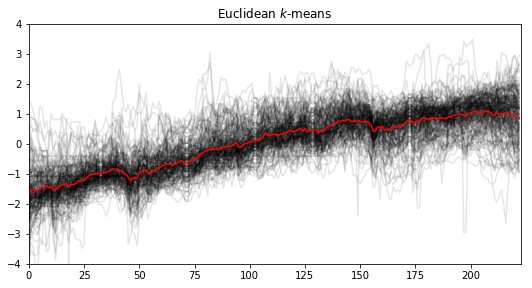

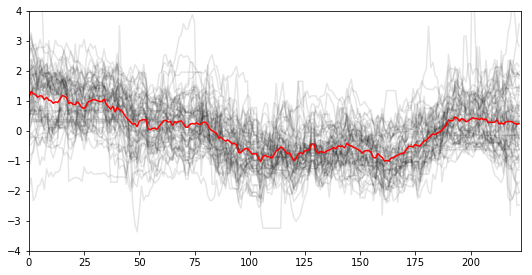

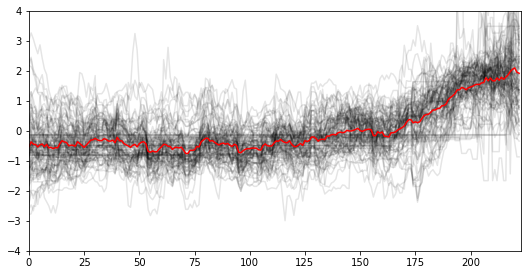

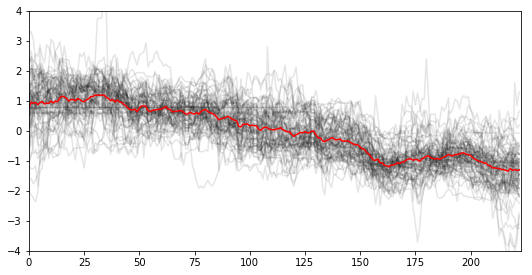

In [21]:
# plot the 5 clusters for Euclidean distance
plt.figure()
for yi in range(5):
    plt.figure(figsize=(30,15))
    plt.subplot(3, 3, yi + 1)
    for xx in df_scaled[clusters_euclid_5 == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.1)
    plt.plot(km_5.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    if yi == 1:
        plt.title("Euclidean $k$-means")
plt.show()

In [21]:
# DBA-k-means
print("DBA k-means")
dba_km_5 = TimeSeriesKMeans(n_clusters=5, n_init=2, metric="dtw", verbose=True, max_iter_barycenter=10, random_state=seed)
clusters_dba_5 = dba_km_5.fit_predict(df_scaled)

DBA k-means
Init 1
43.915 --> 25.608 --> 24.409 --> 24.032 --> 23.799 --> 23.654 --> 23.614 --> 23.601 --> 23.597 --> 23.597 --> 23.597 --> 


In [41]:
# use sklearn package's metrics class to get the silhouette score
skm.silhouette_score(df_matrix, clusters_dba_5, metric='euclidean')  

-0.34325195038768369

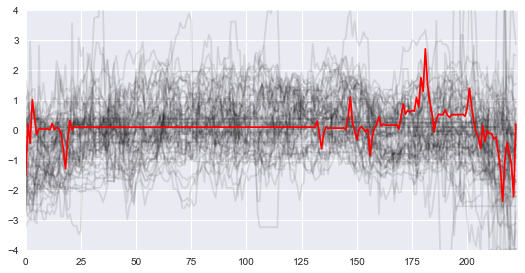

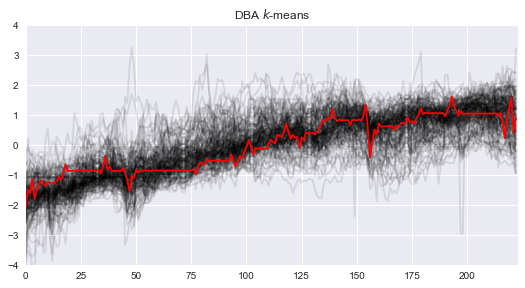

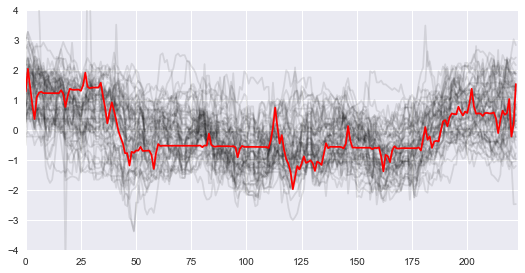

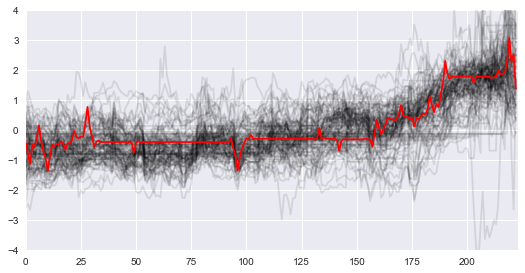

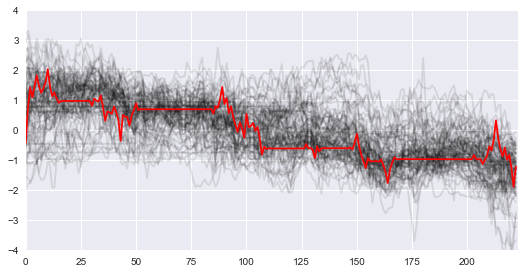

In [23]:
# plot DBA-k-means clusters
for yi in range(5):
    plt.figure(figsize=(30,15))
    plt.subplot(3, 3, 4 + yi)
    for xx in df_scaled[clusters_dba_5 == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.1)
    plt.plot(dba_km_5.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    if yi == 1:
        plt.title("DBA $k$-means")

In [25]:
dba_km_5.inertia_

23.597231609101076

In [27]:
# Soft-DTW-k-means
print("Soft-DTW k-means")
sdtw_km_5 = TimeSeriesKMeans(n_clusters=5, metric="softdtw", metric_params={"gamma_sdtw": .01},
                           verbose=True, random_state=seed)
clusters_soft_5 = sdtw_km_5.fit_predict(df_scaled)

Soft-DTW k-means
3608.981 --> 969.704 --> 943.810 --> 902.496 --> 903.393 --> 901.985 --> 911.753 --> 907.490 --> 925.980 --> 935.710 --> 924.568 --> 910.258 --> 904.390 --> 937.533 --> 953.824 --> 935.513 --> 938.461 --> 929.792 --> 1049.346 --> 919.243 --> 924.143 --> 916.803 --> 916.803 --> 


In [42]:
# use sklearn package's metrics class to get the silhouette score
skm.silhouette_score(df_matrix, clusters_soft_5, metric='euclidean') 

-0.28769215392782832

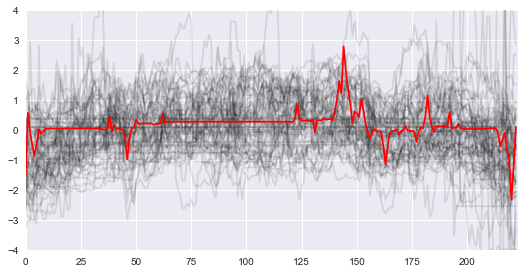

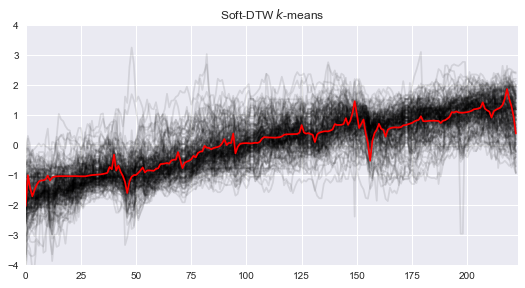

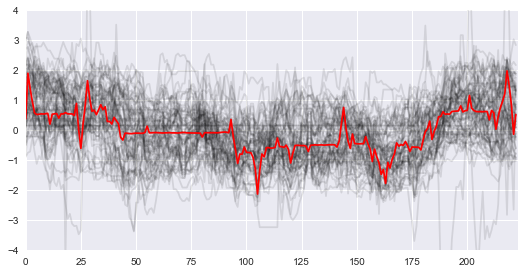

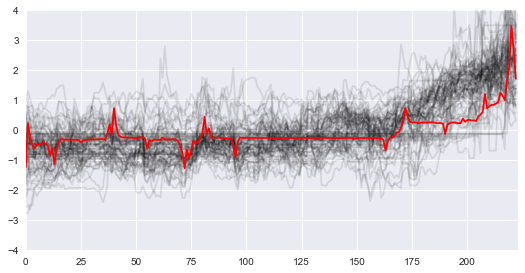

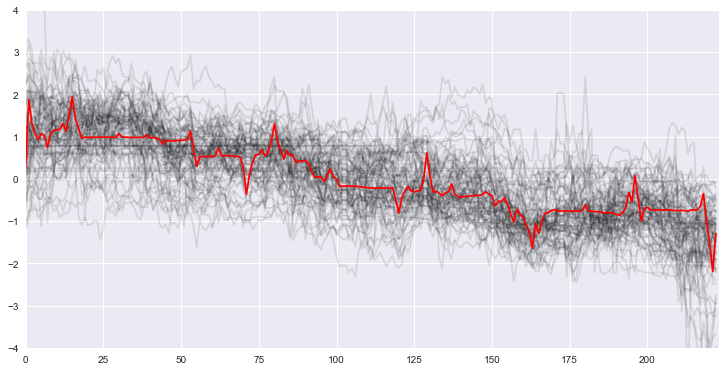

In [31]:
# plot Soft-DTW-k-means
for yi in range(5):
    plt.figure(figsize=(30,15))
    plt.subplot(3, 3, 5 + yi)
    for xx in df_scaled[clusters_soft_5 == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.1)
    plt.plot(sdtw_km_5.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    if yi == 1:
        plt.title("Soft-DTW $k$-means")

plt.tight_layout()
plt.show()

In [22]:
# Euclidean clustering labels for K=5
euclid_labels_5 = km_5.labels_
print(euclid_labels_5)

[3 3 1 1 3 1 1 1 1 3 1 3 0 2 3 4 1 1 2 1 2 0 3 0 1 3 3 1 3 2 1 1 2 4 2 2 1
 1 3 3 1 4 3 3 3 2 2 3 2 1 1 0 1 1 4 1 2 2 1 1 1 4 0 2 4 1 4 1 2 4 0 1 1 4
 2 4 1 4 3 0 1 1 1 0 4 1 1 0 2 3 4 1 1 1 1 4 0 1 2 2 4 1 1 2 4 0 1 0 2 1 2
 3 1 1 4 2 3 1 3 3 3 0 2 1 1 3 3 2 3 3 1 1 1 4 0 0 4 1 4 0 1 0 1 0 1 2 4 4
 0 1 4 3 2 2 1 1 1 0 0 3 4 1 1 1 3 1 1 1 3 1 1 1 1 3 0 4 3 2 1 2 1 1 1 4 3
 3 3 1 0 2 0 1 2 3 3 0 1 0 1 1 0 1 1 2 1 0 4 1 1 1 3 0 3 0 1 1 4 4 3 3 0 2
 1 4 3 2 3 1 4 1 3 2 0 3 1 3 1 1 2 4 3 1 2 1 3 1 2 1 3 2 4 3 2 3 3 1 4 1 4
 1 1 4 1 4 1 4 0 1 0 3 4 1 0 0 1 3 1 1 2 3 3 4 3 1 1 1 4 3 3 3 4 1 1 1 3 1
 1 4 2 1 1 0 3 0 1 2 4 1 4 4 1 1 1 0 0 1 1 3 1 3 1 4 2 2 4 3 1 4 3 4 3 1 3
 1 1 1 1 1 1 4 3 1 0 1 0 4 1 1 0 4 1 4 1 0 1 4 1 0 1 3 2 2 0 0 1 1 3 3 4 3
 2 0 1 3 2 3 1 1 3 0 4 3 1 2 3 2 3 4 0 1 1 4 1 0 1 3 4 4 1 1 2 3 1 1 3 0 4
 1 1 4 4 1 3 3 3 1 3 0 2 1 4 0 1 0 4 3 1 3 0 4 1 3 1 1 3 4 1 4 2 3 1 2 3 1
 4 3 1 1 1 0 3 4 1 1 1 3 1 4 2 2 1 1 2 4 1 1 4 0 1 1 4 1 3 2 1 3 1 2 1 2 1
 1 1 0 2 4 3 3 1 2 1 3 3 

(array([  61.,    0.,  195.,    0.,    0.,   63.,    0.,  104.,    0.,   77.]),
 array([ 0. ,  0.4,  0.8,  1.2,  1.6,  2. ,  2.4,  2.8,  3.2,  3.6,  4. ]),
 <a list of 10 Patch objects>)

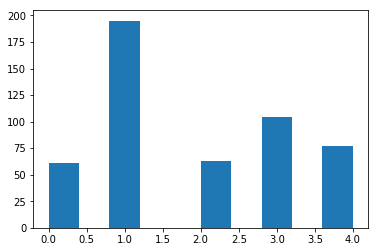

In [23]:
# plot histogram of cluster distribution for Euclidean distance K-means for K=5
plt.hist(euclid_labels_5)

In [24]:
# read in csv with stock symbols, names, and industry
# from http://www.nasdaq.com/screening/companies-by-industry.aspx?exchange=NASDAQ&render=download
df_ticker = pd.read_csv('./companylist.csv', sep=',', index_col=0)

In [25]:
df_ticker.head()

,Name,LastSale,MarketCap,ADR TSO,IPOyear,Sector,Industry,Summary Quote,Unnamed: 9
Symbol,,,,,,,,,
PIH,"1347 Property Insurance Holdings, Inc.",7.2,4.309032e+07,n/a,2014,Finance,Property-Casualty Insurers,http://www.nasdaq.com/symbol/pih,NaN
TURN,180 Degree Capital Corp.,1.99,6.193191e+07,n/a,n/a,Finance,Finance/Investors Services,http://www.nasdaq.com/symbol/turn,NaN
FLWS,"1-800 FLOWERS.COM, Inc.",10.75,6.947130e+08,n/a,1999,Consumer Services,Other Specialty Stores,http://www.nasdaq.com/symbol/flws,NaN
FCCY,1st Constitution Bancorp (NJ),18.45,1.489497e+08,n/a,n/a,Finance,Savings Institutions,http://www.nasdaq.com/symbol/fccy,NaN
SRCE,1st Source Corporation,49.31,1.278911e+09,n/a,n/a,Finance,Major Banks,http://www.nasdaq.com/symbol/srce,NaN


In [27]:
# change ticker symbol to lower case to inner join merge with cluster dataframe
df_ticker.index = df_ticker.index.str.lower()

In [28]:
# Add a new column that is the ticker symbols to join/merge with cluster data frame
df_ticker['Symbol'] = df_ticker.index.values

In [33]:
df_ticker.shape

(3281, 10)

In [29]:
# read in csv with stock symbols, names, and industry
# from http://www.nasdaq.com/screening/companies-by-industry.aspx?exchange=NYSE&render=download
df_ticker_2 = pd.read_csv('./companylist2.csv', sep=',', index_col=0)

In [30]:
# change ticker symbol to lower case to inner join merge with cluster dataframe
df_ticker_2.index = df_ticker_2.index.str.lower()

In [31]:
# Add a new column that is the ticker symbols to join/merge with cluster data frame
df_ticker_2['Symbol'] = df_ticker_2.index.values

In [32]:
df_ticker_2.shape

(3147, 10)

In [34]:
# merge the two ticker data frames to see how many duplicate rows there are (same symbol)
df_ticker_merge = pd.merge(df_ticker, df_ticker_2, on='Symbol', how='inner')
df_ticker_merge.shape

(6, 19)

In [35]:
# There are 6 duplicate tickers to remove from the second data frame before concatenating
duplicate_tickers = df_ticker_merge.Symbol.values
duplicate_tickers

array(['eght', 'amov', 'fcfs', 'pgti', 'rrd', 'msg'], dtype=object)

In [36]:
df_ticker_2 = df_ticker_2.drop(duplicate_tickers)
df_ticker_2.shape

(3141, 10)

In [46]:
# now concatenate the two ticker data frames, since the duplicate rows have been removed
df_ticker_concat = pd.concat([df_ticker, df_ticker_2])
df_ticker_concat.shape

(6422, 10)

In [47]:
# drop the columns we aren't interested in, and/or have too many 'n/a' values to be useful
df_ticker_concat.drop(['ADR TSO','IPOyear','LastSale','Unnamed: 9'], axis=1, inplace=True)
df_ticker_concat.shape

(6422, 6)

In [48]:
df_ticker_concat.head()

,Name,MarketCap,Sector,Industry,Summary Quote,Symbol
Symbol,,,,,,
pih,"1347 Property Insurance Holdings, Inc.",4.309032e+07,Finance,Property-Casualty Insurers,http://www.nasdaq.com/symbol/pih,pih
turn,180 Degree Capital Corp.,6.193191e+07,Finance,Finance/Investors Services,http://www.nasdaq.com/symbol/turn,turn
flws,"1-800 FLOWERS.COM, Inc.",6.947130e+08,Consumer Services,Other Specialty Stores,http://www.nasdaq.com/symbol/flws,flws
fccy,1st Constitution Bancorp (NJ),1.489497e+08,Finance,Savings Institutions,http://www.nasdaq.com/symbol/fccy,fccy
srce,1st Source Corporation,1.278911e+09,Finance,Major Banks,http://www.nasdaq.com/symbol/srce,srce


In [49]:
# write to a csv file so we can just load it later if needed
df_ticker_concat.to_csv('nasdaq_ticker_details.csv')

In [53]:
# read from the csv file (in case kernel was stopped and memory was released)
df_ticker_concat = pd.read_csv('./nasdaq_ticker_details.csv', sep=',')

In [54]:
df_ticker_concat.shape

(6422, 7)

In [55]:
df_ticker_concat.head()

,Symbol,Name,MarketCap,Sector,Industry,Summary Quote,Symbol.1
0,pih,"1347 Property Insurance Holdings, Inc.",4.309032e+07,Finance,Property-Casualty Insurers,http://www.nasdaq.com/symbol/pih,pih
1,turn,180 Degree Capital Corp.,6.193191e+07,Finance,Finance/Investors Services,http://www.nasdaq.com/symbol/turn,turn
2,flws,"1-800 FLOWERS.COM, Inc.",6.947130e+08,Consumer Services,Other Specialty Stores,http://www.nasdaq.com/symbol/flws,flws
3,fccy,1st Constitution Bancorp (NJ),1.489497e+08,Finance,Savings Institutions,http://www.nasdaq.com/symbol/fccy,fccy
4,srce,1st Source Corporation,1.278911e+09,Finance,Major Banks,http://www.nasdaq.com/symbol/srce,srce


In [56]:
stock_names_500 = df_transposed_500.index.values
print(stock_names_500)

['hae' 'dan' 'lnt' 'awr' 'feng' 'bsmx' 'muj' 'cez' 'hrzn' 'acn' 'ddr_a'
 'nymt' 'lng' 'crd-b' 'qmom' 'nsh' 'emn' 'alfi' 'mjco' 'snps' 'ds_d' 'eigi'
 'ln' 'pw' 'msd' 'bmra' 'bita' 'scm' 'vygr' 'jag' 'nvo' 'edf' 'cmp' 'imuc'
 'dave' 'pnfp' 'gaia' 'kala' 'goau' 'mmi' 'thw' 'tntr' 'fnlc' 'mxim' 'ae'
 'tril' 'bcei' 'gra' 'cunb' 'cubn' 'deus' 'ofg_a' 'ip' 'rmcf' 'obln' 'mitt'
 'cveo' 'rlj' 'cws' 'hcom' 'sce_e' 'seas' 'nymtn' 'psxp' 'ast' 'banc_d'
 'astc' 'wnc' 'calm' 'ygyi' 'inve' 'org' 'moti' 'epr_c' 'lbtyk' 'nptn'
 'cns' 'pei' 'vsh' 'trcrw' 'psa_w' 'jeld' 'pci' 'plya' 'nvgn' 'wea' 'bax'
 'gcp' 'arc' 'nwli' 'csv' 'ncz' 'mtn' 'lyg' 'anss' 'pfh' 'mrbk' 'mgee'
 'snbc' 'kaacu' 'cls' 'prta' 'usap' 'chrw' 'tkat' 'mfem' 'pht' 'cbo' 'kirk'
 'dmrc' 'fhb' 'gty' 'agfs' 'awf' 'stpp' 'cdr' 'lgf-b' 'nhs' 'bkmu' 'spro'
 'pstg' 'celg' 'psa' 'joe' 'jco' 'nmm' 'esio' 'alex' 'dotau' 'centa' 'it'
 'hcsg' 'wen' 'smrt' 'bhacr' 'fn' 'taho' 'csgp' 'epd' 'jwn' 'trv' 'ypf'
 'bfo' 'cbm' 'irbt' 'cof' 'nept' 'esv' 'sxe

In [57]:
# create a new data frame from the euclidean distance clusters and stock symbols where K=5
df_euclid_clusters_5 = pd.DataFrame({'Stocks': stock_names_500, 'Clusters': euclid_labels_5})
df_euclid_clusters_5.head(10)

,Clusters,Stocks
0,3,hae
1,3,dan
2,1,lnt
3,1,awr
4,3,feng
5,1,bsmx
6,1,muj
7,1,cez
8,1,hrzn
9,3,acn


In [58]:
# now merge with the euclidean (5) clusters data frame (there should be more rows returned by inner join)
df_euclid_merge_5 = df_euclid_clusters_5.merge(df_ticker_concat, left_on='Stocks', right_on='Symbol', how='inner')
df_euclid_merge_5.head()

,Clusters,Stocks,Symbol,Name,MarketCap,Sector,Industry,Summary Quote,Symbol.1
0,3,hae,hae,Haemonetics Corporation,3.015921e+09,Health Care,Medical/Dental Instruments,http://www.nasdaq.com/symbol/hae,hae
1,3,dan,dan,Dana Incorporated,4.499692e+09,Capital Goods,Auto Parts:O.E.M.,http://www.nasdaq.com/symbol/dan,dan
2,1,lnt,lnt,Alliant Energy Corporation,1.016143e+10,Public Utilities,Power Generation,http://www.nasdaq.com/symbol/lnt,lnt
3,1,awr,awr,American States Water Company,2.016254e+09,Public Utilities,Water Supply,http://www.nasdaq.com/symbol/awr,awr
4,3,feng,feng,Phoenix New Media Limited,4.806238e+08,Consumer Services,Broadcasting,http://www.nasdaq.com/symbol/feng,feng


In [59]:
df_euclid_merge_5.shape

(396, 9)

In [60]:
df_euclid_merge_5.groupby(['Clusters','Sector']).size()

Clusters  Sector               
0         Basic Industries          2
          Capital Goods             3
          Consumer Durables         1
          Consumer Services         8
          Energy                    1
          Finance                   3
          Health Care               7
          Miscellaneous             1
          Public Utilities          4
          Technology                9
          Transportation            2
          n/a                       5
1         Basic Industries          5
          Capital Goods             7
          Consumer Durables         6
          Consumer Non-Durables     5
          Consumer Services        17
          Energy                    1
          Finance                  20
          Health Care              16
          Miscellaneous             3
          Public Utilities          4
          Technology               19
          Transportation            3
          n/a                      40
2         Basic In

In [70]:
df_euclid_merge_5.Sector.value_counts()

Consumer Services        63
n/a                      55
Finance                  54
Health Care              52
Technology               48
Capital Goods            31
Basic Industries         17
Energy                   17
Transportation           16
Public Utilities         13
Miscellaneous            12
Consumer Non-Durables     9
Consumer Durables         9
Name: Sector, dtype: int64